# Task 1: Movie Genre Classification


In [1]:
#Loading Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#Importing Datasets
train_data = pd.read_csv('/content/train_data.txt', sep=':::', names=['id', 'Title', 'Genre', 'Description'], engine='python')
test_data = pd.read_csv('/content/test_data.txt', sep=':::', names=['id','Title', 'Genre', 'Description'], engine='python')
test_solution_data = pd.read_csv("/content/test_data_solution.txt",sep=':::', names=['id', 'Title', 'Genre', 'Description'], engine='python')

print("train_data")
display(train_data.head())
print(len(train_data))

print("test_data")
display(test_data.head())
print(len(test_data))

print("test_solution_data")
display(test_solution_data.head())
print(len(test_solution_data))

train_data


,id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


3178
test_data


,id,Title,Genre,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


3260
test_solution_data


,id,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


3202


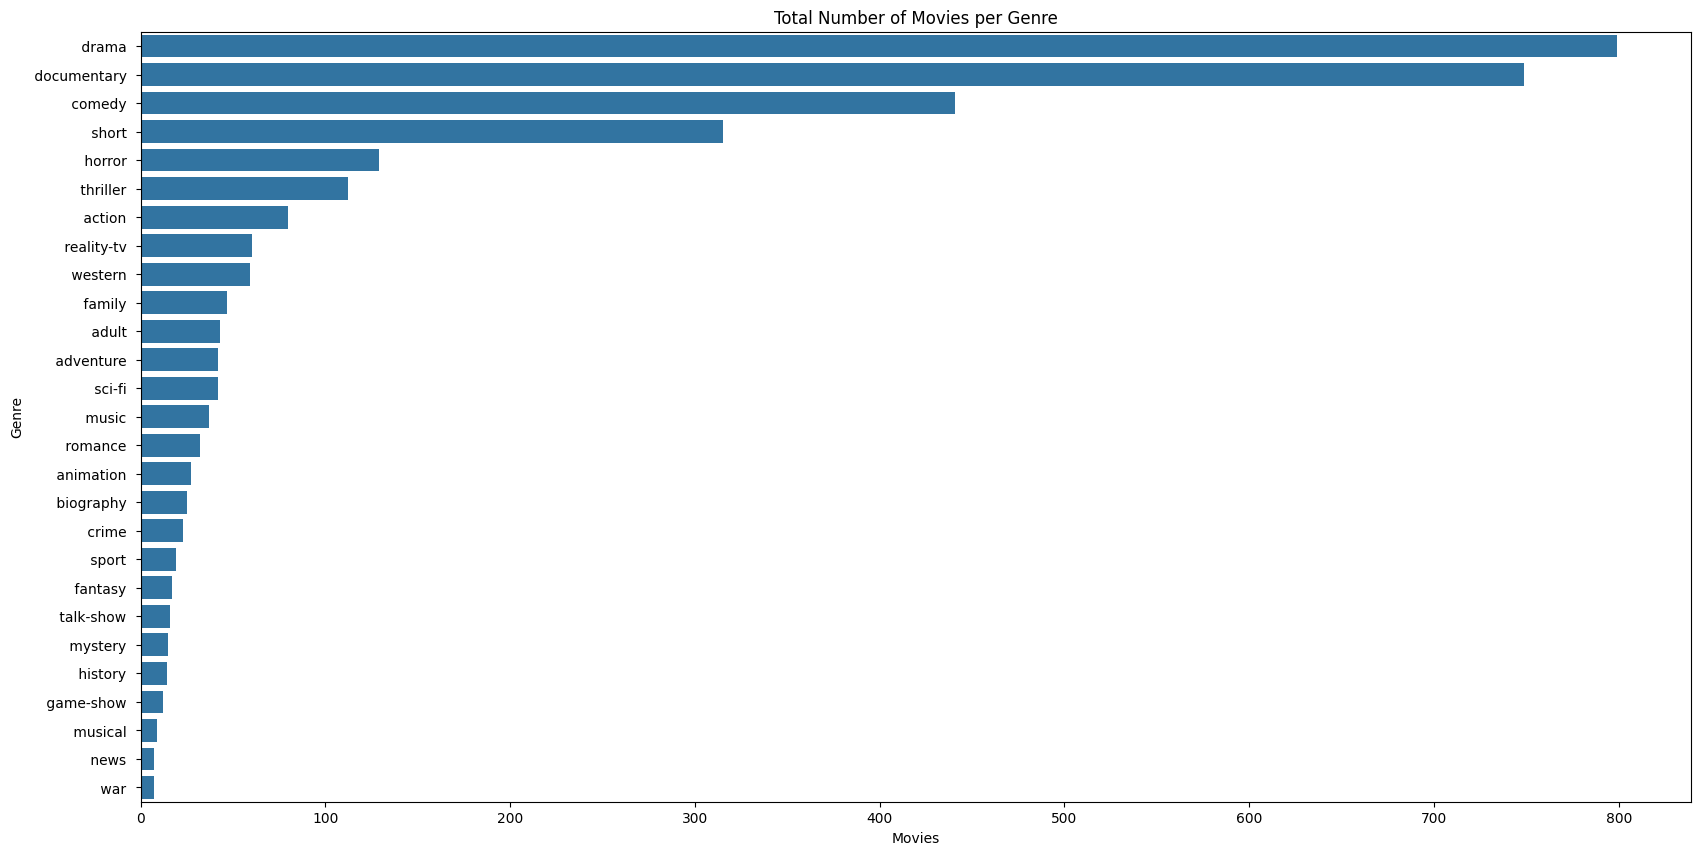

In [3]:
#Data Visualization
plt.figure(figsize=(20,10))
sns.countplot(y=train_data['Genre'], order = train_data['Genre'].value_counts().index)
plt.title('Total Number of Movies per Genre')
plt.xlabel('Movies')
plt.ylabel('Genre')
plt.show()

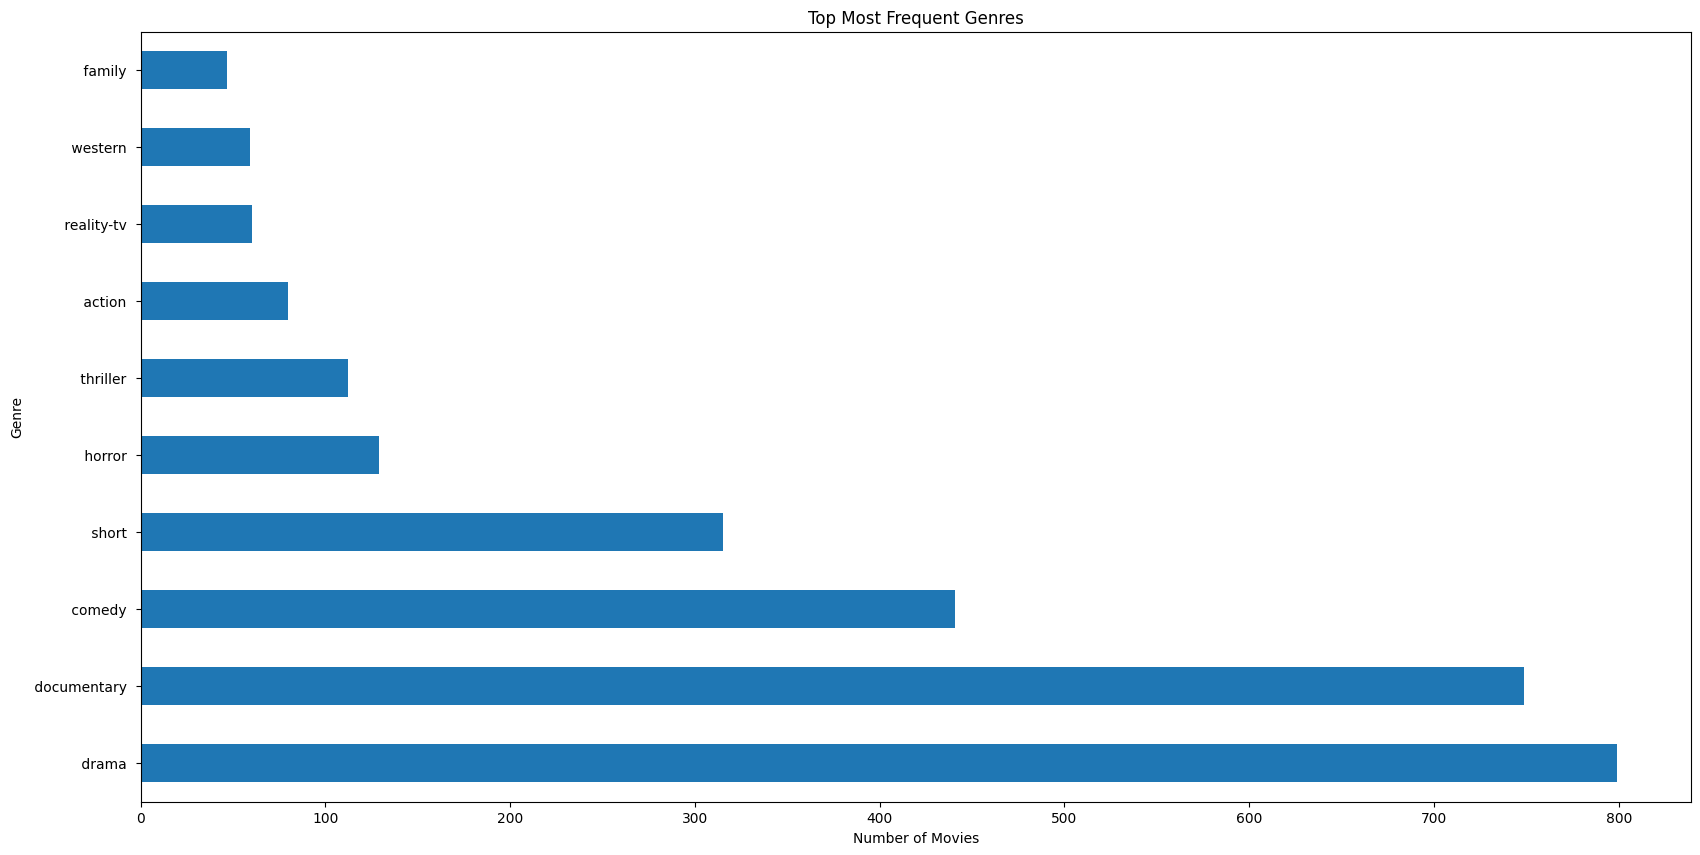

In [4]:
#To Know top Genres, Most of the People watched
top_genres = train_data['Genre'].value_counts().head(10)

plt.figure(figsize=(20, 10))
top_genres.plot(kind='barh')
plt.title('Top Most Frequent Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

In [5]:
#Training And Testing of ML model

#Handling Missing Data
train_data['Description'] = train_data['Description'].fillna("").astype(str)
test_solution_data['Description'] = test_solution_data['Description'].fillna("").astype(str)

#text feature extraction using TF-IDF
t_v = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = t_v.fit_transform(train_data['Description'])
X_test = t_v.transform(test_solution_data['Description'])

#encoding using label encoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['Genre'])
y_test = label_encoder.transform(test_solution_data['Genre'])

In [6]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#Support Vector Machine For Classification
svm = LinearSVC()
svm.fit(X_train_sub, y_train_sub)

y_val_pred = svm.predict(X_val)
print("Accuracy of Validation:", accuracy_score(y_val, y_val_pred))
print("Validation Classifications:\n", classification_report(y_val, y_val_pred))

Accuracy of Validation: 0.5047169811320755
Validation Classifications:
               precision    recall  f1-score   support

           0       0.50      0.07      0.12        15
           1       0.00      0.00      0.00        11
           2       0.33      0.12      0.18         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         4
           5       0.37      0.38      0.37        74
           6       0.00      0.00      0.00         6
           7       0.61      0.82      0.70       160
           8       0.46      0.81      0.59       154
           9       1.00      0.10      0.18        10
          10       0.00      0.00      0.00         3
          11       1.00      0.50      0.67         2
          12       0.00      0.00      0.00         3
          13       0.50      0.22      0.30        23
          14       0.00      0.00      0.00        16
          15       0.00      0.00      0.00         2
         

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
y_pred = svm.predict(X_test)
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print("Test Data Classifications:\n", classification_report(y_test, y_pred))

Accuracy on Test Data: 0.49937539038101186
Test Data Classifications:
               precision    recall  f1-score   support

           0       0.50      0.10      0.17        88
           1       0.25      0.03      0.06        32
           2       0.56      0.10      0.18        48
           3       0.00      0.00      0.00        42
           4       0.00      0.00      0.00        15
           5       0.43      0.43      0.43       428
           6       0.00      0.00      0.00        25
           7       0.56      0.85      0.67       734
           8       0.48      0.74      0.58       842
           9       0.00      0.00      0.00        33
          10       0.00      0.00      0.00        11
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00        19
          13       0.63      0.35      0.45       134
          14       1.00      0.02      0.04        47
          15       0.00      0.00      0.00        10
          

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
#Function to Predict the Genre of the Movie
def predict_genre(description):
    t_v1 = t_v.transform([description])
    pred_label = svm.predict(t_v1)
    return label_encoder.inverse_transform(pred_label)[0]

In [10]:

#Some Movie Descriptions

#1. A group of friends is haunted by a malevolent spirit after visiting an abandoned asylum.
#2. A young girl struggles to overcome poverty and pursue education in a remote village.
#3. A powerful exploration of the global plastic pollution crisis and its devastating effects on marine life and human health.
#4. The film follows the life of a famous painter, showcasing rare footage of his creative process and personal struggles.
#5. After getting fired, a clueless man pretends to be a kindergarten teacher to pay his rent, causing chaos and laughter.


In [11]:
while True:
    user_input = input("Enter a movie description (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    genre = predict_genre(user_input)
    print("Genre:", genre)

Enter a movie description (or type 'exit' to quit): A group of friends is haunted by a malevolent spirit after visiting an abandoned asylum.
Genre:  horror 
Enter a movie description (or type 'exit' to quit): A young girl struggles to overcome poverty and pursue education in a remote village.
Genre:  drama 
Enter a movie description (or type 'exit' to quit): A powerful exploration of the global plastic pollution crisis and its devastating effects on marine life and human health.
Genre:  documentary 
Enter a movie description (or type 'exit' to quit): The film follows the life of a famous painter, showcasing rare footage of his creative process and personal struggles.
Genre:  documentary 
Enter a movie description (or type 'exit' to quit): After getting fired, a clueless man pretends to be a kindergarten teacher to pay his rent, causing chaos and laughter.
Genre:  comedy 
Enter a movie description (or type 'exit' to quit): exit
